## Notebook objectives

Apply Recency Frequency Value (RFV) targeting strategy.

[RFM](https://www.barilliance.com/rfm-analysis/#tve-jump-17b4fc9cc54)

[Cohort Analysis](https://www.barilliance.com/cohort-analysis/)

RFV segmentation allows marketers to target specific clusters of customers with communications that are much more relevant for their particular behavior – and thus generate much higher rates of response, plus increased loyalty and customer lifetime value.

## Agenda

[Business Context](#Business-Context)<br> 
&emsp;[Business Questions](#Business-Questions)<br>
&emsp;[Hypothesis](#Hypothesis)<br>

[Imports](#Imports)<br>
&emsp;[Helper Functions and Classes](#Helper-Functions-and-Classes)<br>


[Settings](#Settings)<br>

[Loading Data](#Loading-Data)<br>
&emsp;[df_orders_abt](#df_orders_abt)<br>


[Analytical Base Table](#Analytical-Base-Table)<br>
&emsp;[df_rfv](#df_rfv)<br>
&emsp;&emsp;[Ranking](#Ranking)<br>
&emsp;[df_customer](#df_customer)<br>

[Analysis](#Analysis)<br>

[Business Answers](#Business-Answers)<br>


## Business Context

E-Mart wants to gain a better understanding of how It provides value to its customers. Based on customer understanding, the retailer will focus on increasing sales by creating messaging that resonates with target audience. In other words, **The ultimate goal of this project is being able to target our users differently given their current status**. 

Therefore, we need to identify customer personas and their value.

- **Who are our best customers?**
<br>

- **Where are they?**
<br>

- **Who has the potential to become valuable customers?**
<br>

- **Which of our customers are most likely to respond to engagement campaigns?**


### Customer Segmentation - RFV


[RFM](https://www.barilliance.com/rfm-analysis/#tve-jump-17b4fc9cc54)
[Cohort Analysis](https://www.barilliance.com/cohort-analysis/)

RFV segmentation allows marketers to target specific clusters of customers with communications that are much more relevant for their particular behavior – and thus generate much higher rates of response, plus increased loyalty and customer lifetime value.



### Business Questions


- **Who are our best customers?**
<br>

- **Where are they?**
<br>

- **Who has the potential to become valuable customers?**
<br>

- **Which of our customers are most likely to respond to engagement campaigns?**


## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Helper Functions and Classes

In [2]:
def get_snakecase_columns(df):
    """Sets column name to snake_case format
    
    df: pandas.DataFrame
    
    Return: map
    """
    snakecase = lambda x: str(x).lower().replace(' ', '_').replace('-', '_')
    return map(snakecase, df.columns)

def date(str_date):
    """Apply pandas.to_datetime to argument converting it to datetime.
        
    """
    return pd.to_datetime(str_date)

def find_column(df, col_name):
    """Checks if DataFrame contains a 'column name' and returns the matched columns
    
    df: pandas.DataFrame
    col_name: column name or part of column name to search for
    
    Return: DataFrame with column names that match the col_name searched
    """
    
    df_cols = pd.DataFrame(df.columns, columns=['col_name'])

    return df_cols[df_cols['col_name'].str.contains(col_name)].reset_index(drop=True)


def fig(x=15, y=5, set_as_global=False, reset_to_default=False):
    """ Adjust size of matplotlib figure

    x: figure width.
    y: figure height.
    set_as_global: bool.
        If True, then it sets "x" and "y" axis for all subsequent plots.
    reset_to_default: bool.
        If True, then it resets the global figure size back to default.
    """
    if set_as_global:
        plt.rcParams["figure.figsize"] = (x, y)
    elif reset_to_default:
        plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
    else:
        plt.figure(figsize=(x,y))
        
        
def classify_customer(recency, frequency):
    if recency <= .2 and frequency <= .2:
        customer_category = "Hibernating"
    elif recency > .9 and frequency > .9:
        customer_category = "Champion"
    elif recency <= .55 and frequency <= .20:
        customer_category = "About to Sleep"
    elif recency <= .8 and frequency <= .20:
        customer_category = "Promising"
    elif recency > .8 and frequency < .20:
        customer_category = "New Customer"
    elif recency <= .2 and frequency > .2 and frequency <= .9:
        customer_category = "At Risk"
    elif recency > .2 and recency <= .55 and frequency >.2 and frequency <= .6:
        customer_category = "Need Attention"
    elif recency > .55 and frequency > .2 and frequency <= .6:
        customer_category = "Potential Loyalist"
    elif recency <= .2 and frequency > .9:
        customer_category = "About to Lose"
    elif recency > .2 and frequency > .6:
        customer_category = "Loyal"
    else:
        customer_category = "CATEGORY ERROR"
    return customer_category

def cluster_boxplot(cluster, y, data, showfliers=False, xticks_rotation=0, figsize=(15, 5)):
    fig(figsize[0], figsize[1])
    plt.subplot( 1, 2, 1 )
    sns.boxplot( x=cluster, y=y[0], data=data, showfliers=showfliers)
    plt.xticks(rotation=xticks_rotation)
    plt.subplot( 1, 2, 2 )
    sns.boxplot( x=cluster, y=y[1], data=data, showfliers=showfliers)
    plt.xticks(rotation=xticks_rotation)

## Settings

In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
%matplotlib inline

## Loading Data

### df_orders_abt

In [5]:
df_orders_abt = pd.read_csv("../../data/growth_analysis/orders_abt.csv")

## Analytical Base Table

## df_rfv

**Recency** - Days since last purchase.

**Frequency** - Total number orders.

**Value** - Sum of revenue.

_Average Value - Average of revenue._

In [6]:
segment = {  
    'Hibernating': 'Low Recency Low Frequency. Made purchase a long time ago and made few transactions.',
    
    'About to Sleep': "Medium Recency Low Frequency. Client's about to stop purchasing.",
    
    'Promising': 'Good Recency Low Frequency. There is some potential. Client that made a purchase recently and has the brand on his mind, client has potential to buy more.',
    
    'New Customer':'High Recency Low Frequency. First purchase.',
    
    'At Risk': 'Low Recency Medium Frequency. Client that made lots of purchases, but a long time ago. Client has used the products and for some reason stopped buying.',
    
    'Need Attention': 'Medium Recency Medium Frequency. Good customer, but as time passes by client does not make a new purchases.',
    
    'Potential Loyalist': 'High Recency Medium Frequency. Client buy some quantity of products and keep buying.',
    
    'About to Lose': "Low Recency High Frequency. Client has made many purchases, but he's not buying anymore.",
    
    'Loyal': 'Medium Recency High Frequency. Our usual customers.',
    
    'Champion': 'High Recency High Frequency. They buy a lot and are "always buying".',
}    

In [76]:
df_rfv = df_orders_abt.copy()
df_rfv['order_date'] = date(df_rfv['order_date'])

CURRENT_DATE = df_rfv['order_date'].max()
YEARS = [2019, 2021, 2022, 2020]
# YEARS = [2020]

agg = {
    'order_date': lambda date: (CURRENT_DATE - date.max()).days, # Recency
    'order_id': 'nunique', # Frequency
    'sales': 'sum', # Value  
}
df_rfv = df_rfv[df_rfv['order_date'].dt.year.isin(YEARS)].groupby("customer_id").agg(agg)
df_rfv.columns = ['recency','frequency','value']
df_rfv.head()

,recency,frequency,value
customer_id,,,
AA-10315,8,19,35459.217783
AA-10375,6,23,11508.993783
AA-10480,117,20,262423.012928
AA-10645,26,36,369585.731434
AA-315,2,7,2216.891129


### Ranking


<p style="color:gray;"><b>2nd Option: Clustering Algorithm<b></p>

In [77]:
df_rfv[['recency_rank', 'frequency_rank', 'value_rank']] = df_rfv.rank(pct=True)
df_rfv['recency_rank'] = (1 - df_rfv['recency_rank']) # so that higher percentage means lower recency 
df_rfv['rfv_class'] = df_rfv.apply(lambda df: classify_customer(df['recency_rank'], df['frequency_rank']), axis=1)
df_rfv.head()

,recency,frequency,value,recency_rank,frequency_rank,value_rank,rfv_class
customer_id,,,,,,,
AA-10315,8,19,35459.217783,0.825472,0.538365,0.627044,Potential Loyalist
AA-10375,6,23,11508.993783,0.867610,0.638994,0.504403,Loyal
AA-10480,117,20,262423.012928,0.212893,0.560377,0.889937,Need Attention
AA-10645,26,36,369585.731434,0.608805,0.985220,0.928302,Loyal
AA-315,2,7,2216.891129,0.936792,0.307862,0.335220,Potential Loyalist


## df_customer

In [78]:
df_customers = (df_orders_abt
                   .groupby("customer_id")
                   .agg(
                       orders=('order_id', 'nunique'),
                       total_sales=('sales', 'sum'),
                       avg_sales=('sales', 'mean'),
                       total_profit=('profit', 'sum'),
                       avg_profit=('profit', 'mean'),
                       total_products=('n_products', 'sum'),
                       avg_products=('n_products', 'mean'),
                       avg_shipping_cost=('shipping_cost', 'mean'),
                       avg_discount=('avg_discount', 'mean'),
                       profitability=('profitable', 'mean'),
                       delivery_on_time_rate=('delivery_on_time', 'mean'),
                       avg_days_to_ship=('days_to_ship', 'mean'),
                       avg_delivery_time=('delivery_time', 'mean'),
                   )
)
df_customers = df_customers.merge(df_rfv, how='left', on='customer_id')
df_customers.head()

,orders,total_sales,avg_sales,total_profit,avg_profit,total_products,avg_products,avg_shipping_cost,avg_discount,profitability,delivery_on_time_rate,avg_days_to_ship,avg_delivery_time,recency,frequency,value,recency_rank,frequency_rank,value_rank,rfv_class
customer_id,,,,,,,,,,,,,,,,,,,,
AA-10315,19,35459.217783,1866.274620,447.69050,23.562658,145,7.631579,65.060526,0.097368,0.789474,0.736842,15.411765,21.941176,8,19,35459.217783,0.825472,0.538365,0.627044,Potential Loyalist
AA-10375,23,11508.993783,500.391034,677.47740,29.455539,139,6.043478,39.300870,0.184420,0.695652,0.869565,15.772727,20.181818,6,23,11508.993783,0.867610,0.638994,0.504403,Loyal
AA-10480,20,262423.012928,13121.150646,1516.47518,75.823759,150,7.500000,81.683500,0.113025,0.750000,0.950000,13.700000,17.750000,117,20,262423.012928,0.212893,0.560377,0.889937,Need Attention
AA-10645,36,369585.731434,10266.270318,3051.43900,84.762194,267,7.416667,48.674167,0.122875,0.861111,0.972222,12.083333,18.085714,26,36,369585.731434,0.608805,0.985220,0.928302,Loyal
AA-315,7,2216.891129,316.698733,535.56600,76.509429,20,2.857143,30.828571,0.257143,0.571429,1.000000,13.285714,17.714286,2,7,2216.891129,0.936792,0.307862,0.335220,Potential Loyalist


In [79]:
# df_customers.reset_index()[['customer_id', 'rfv_class']].to_csv("../../data/customer_segmentation/customer_rfv.csv", index=False)

In [80]:
df_customers.groupby('rfv_class').mean().loc[['Need Attention']][['orders', 'avg_products', 'recency']]

,orders,avg_products,recency
rfv_class,,,
Need Attention,10.440476,5.173455,71.444444


### Analysis


- **Champions - High Recency High Frequency**

        High Value. They buy a lot and are "always buying".
          Avg quantity of orders: 34
          Avg quantity of products: 7
          Avg Recency: 2 days
        
    
<br>   

- **Loyal - Medium Recency High Frequency**

        Our valuable usual customers. Many purchases, but not so recent.
            Avg quantity of orders: 27
            Avg quantity of products: 7
            Avg Recency: 1 month
<br>    

- **Potential Loyalist - High Recency Medium Frequency**

        Client recently bought some quantity of products and kept buying.
            Avg quantity of orders: 12
            Avg quantity of products: 5
            Avg Recency: 2 weeks

<br>  

- **Promising - Good Recency Low Frequency**

        Client made a purchase recently and has the brand on his mind,
        Client has potential to buy more.
            Avg quantity of orders: 4
            Avg quantity of products: 4
            Avg Recency: 20 days
<br>   

- **New Customer - High Recency Low Frequency**

        First purchases. Potential to buy more.
            Avg quantity of orders: 4  
            Avg quantity of products: 6
            Avg Recency: 4 days

<br>  


- **About to lose - Low Recency High Frequency**

        Client has made many purchases, but he's not buying anymore.
            Avg quantity of orders: 33
            Avg quantity of products: 7
            Avg Recency: 4.5 months

<br>

- **At Risk - Low Recency Medium Frequency**

        Client that made lots of purchases, but a long time ago.
        Client has used the products and for some reason stopped buying.
            Avg quantity of orders: 8
            Avg quantity of products: 4
            Avg Recency: 7.7 months
            
<br>   

- **Need Attention - Medium Recency Medium Frequency**

        Good customer, but as time passes by client does not make a new purchases.
            Avg quantity of orders: 10
            Avg quantity of products: 5
            Avg Recency: 2 months
            
<br>


- **About to sleep - Medium Recency Low Frequency**

        Client's about to stop purchasing.
            Avg quantity of orders: 4
            Avg quantity of products: 4
            Avg Recency: 3 months
            
<br>


- **Hibernating - Low Recency Low Frequency**

        Made purchase a long time ago and made few transactions.
            Avg quantity of orders: 3
            Avg quantity of products: 4
            Avg Recency: almost a whole year




**Now, We can**

- Generate more focused marketing strategies that help us create messaging that resonates with our target audience.
<br>

- Enable sales and support teams to improve their strategies for engagement and overall customer satisfaction.
<br>

- Create more customized content and build more meaningful interactions that drives customer loyalty for the brand.

In [81]:
df_customers.groupby('rfv_class').mean().loc[['Hibernating']][['orders', 'avg_products', 'recency']]

,orders,avg_products,recency
rfv_class,,,
Hibernating,3.624277,4.784682,334.265896


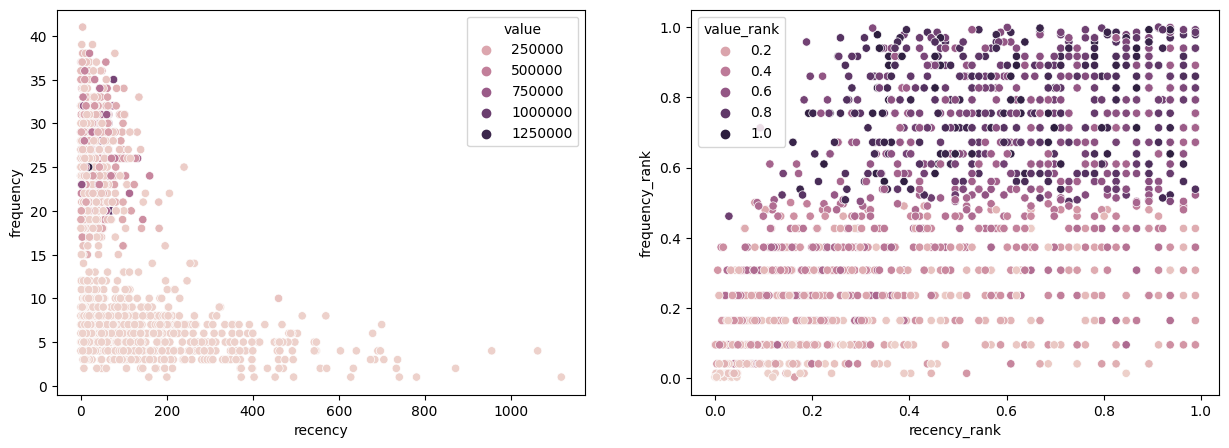

In [82]:
fig()
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_rfv, x='recency', y='frequency', hue='value');
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_rfv, x='recency_rank', y='frequency_rank', hue='value_rank');

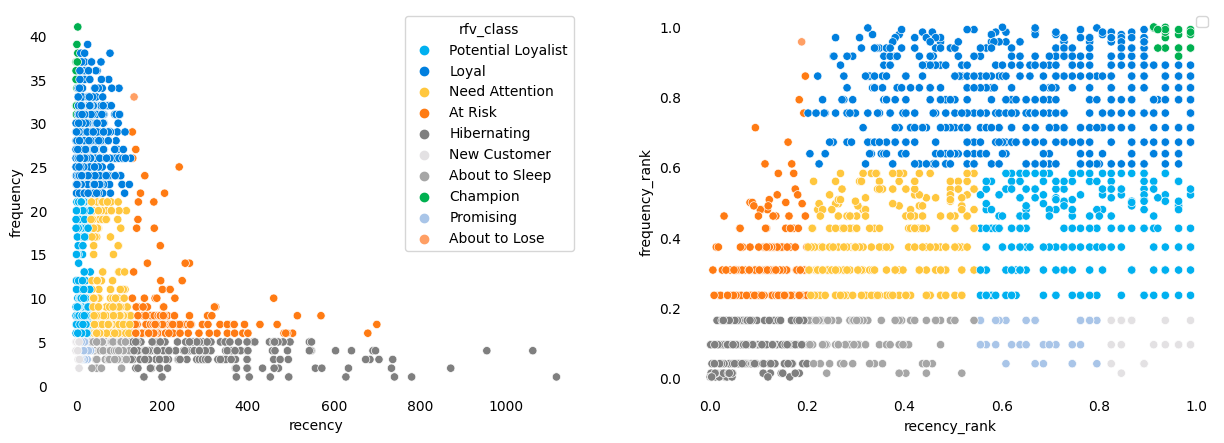

In [83]:
fig()

green, blue, light_blue, light_blue_r, white, orange, light_orange, yellow, grey, dark_grey = '#00B050', '#007FDE', '#00B0F0', '#A9C5E8', '#E3E1E3','#FF7B13', '#FF9F64', '#FFC73E', '#A6A6A6', '#7F7F7F'
palette = [light_blue, blue, yellow, orange, dark_grey, white, grey, green, light_blue_r, light_orange]
# palette = [green, blue, light_blue, light_blue_r, white, orange, light_orange, yellow, grey, dark_grey]
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_rfv, x='recency', y='frequency', hue='rfv_class', palette=palette);
plt.box(False)
plt.tick_params('both', length=0)
# plt.legend()
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_rfv, x='recency_rank', y='frequency_rank', hue='rfv_class', palette=palette, )
plt.box(False)
plt.tick_params('both', length=0)

plt.legend([]);

In [84]:
df_customers.groupby('rfv_class').mean()

,orders,total_sales,avg_sales,total_profit,avg_profit,total_products,avg_products,avg_shipping_cost,avg_discount,profitability,delivery_on_time_rate,avg_days_to_ship,avg_delivery_time,recency,frequency,value,recency_rank,frequency_rank,value_rank
rfv_class,,,,,,,,,,,,,,,,,,,
About to Lose,33.000000,62477.017522,1893.242955,1749.982000,53.029758,248.000000,7.515152,61.151515,0.136465,0.757576,0.939394,15.454545,20.718750,135.000000,33.000000,62477.017522,0.188365,0.957547,0.727044
About to Sleep,4.229885,1492.788104,343.527583,181.270414,43.250329,18.413793,4.356130,40.007563,0.162375,0.736015,0.871839,13.569923,18.861877,83.494253,4.229885,1492.788104,0.318850,0.116558,0.176932
At Risk,8.786207,17215.602960,998.377428,202.146869,21.110988,45.868966,4.876544,38.197964,0.167328,0.729427,0.903404,14.065495,19.027434,232.027586,8.786207,17215.602960,0.118712,0.350054,0.332288
Champion,34.904762,193369.432886,5661.876493,2312.220029,65.558699,268.095238,7.637156,58.549261,0.143786,0.728963,0.894306,13.521357,18.595108,1.523810,34.904762,193369.432886,0.953220,0.967999,0.807637
Hibernating,3.624277,1181.313762,328.289303,107.216671,29.181505,17.156069,4.784682,38.744100,0.189872,0.696146,0.934971,13.222254,18.328998,334.265896,3.624277,1181.313762,0.083806,0.085511,0.163100
Loyal,27.465909,183238.979143,6741.695417,1773.214583,64.705616,206.579545,7.531718,56.721111,0.134587,0.754910,0.907533,13.606900,18.694490,29.454545,27.465909,183238.979143,0.647057,0.792336,0.761095
Need Attention,10.440476,32691.170713,1816.020831,427.962221,37.894599,59.440476,5.173455,40.878832,0.145794,0.754111,0.905375,13.149914,18.250043,71.444444,10.440476,32691.170713,0.365069,0.397156,0.394145
New Customer,4.190476,1950.512380,441.317797,232.924000,51.664476,27.619048,6.379365,51.498659,0.183095,0.702381,0.902381,12.003968,17.379365,4.619048,4.190476,1950.512380,0.894160,0.113342,0.236178
Potential Loyalist,12.255230,39619.518097,2153.089563,611.009737,42.509845,74.389121,5.472992,41.744527,0.160724,0.732616,0.914588,13.063938,18.159684,14.393305,12.255230,39619.518097,0.760647,0.434283,0.448012


In [92]:
df_customers.shape

(1590, 20)

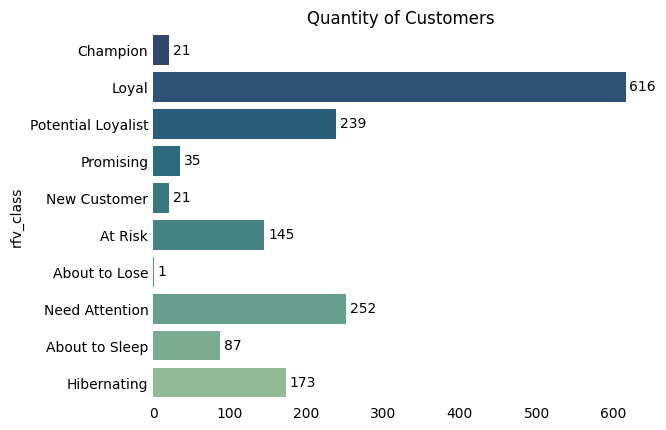

In [90]:
categories = ['Champion', 'Loyal', 'Potential Loyalist', 'Promising', 'New Customer', 'At Risk', 
              'About to Lose', 'Need Attention', 'About to Sleep', 'Hibernating']
plt.box(False)
ax = sns.countplot(y='rfv_class', data=df_customers, palette='crest_r', order=categories)
plt.title('Quantity of Customers')
plt.tick_params(axis='both', length=0)
plt.xlabel(None)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_width()), (p.get_width()+5, p.get_y()+.5))

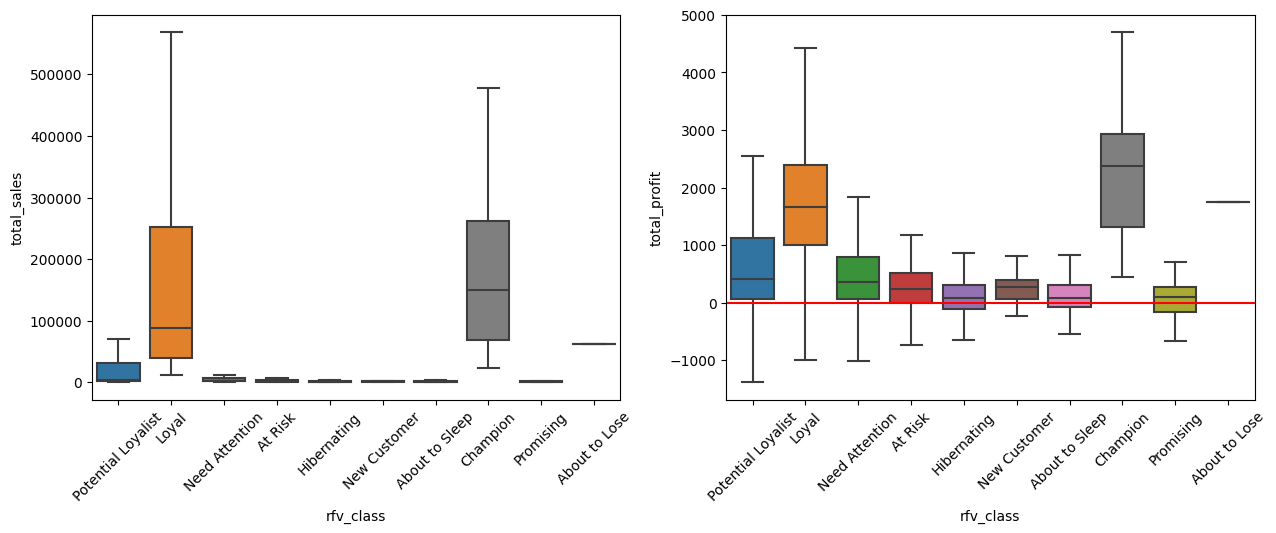

In [17]:
cluster_boxplot(cluster='rfv_class', y=['total_sales', 'total_profit'], data=df_customers, xticks_rotation=45,
                showfliers=False)
plt.axhline(0, color='r');

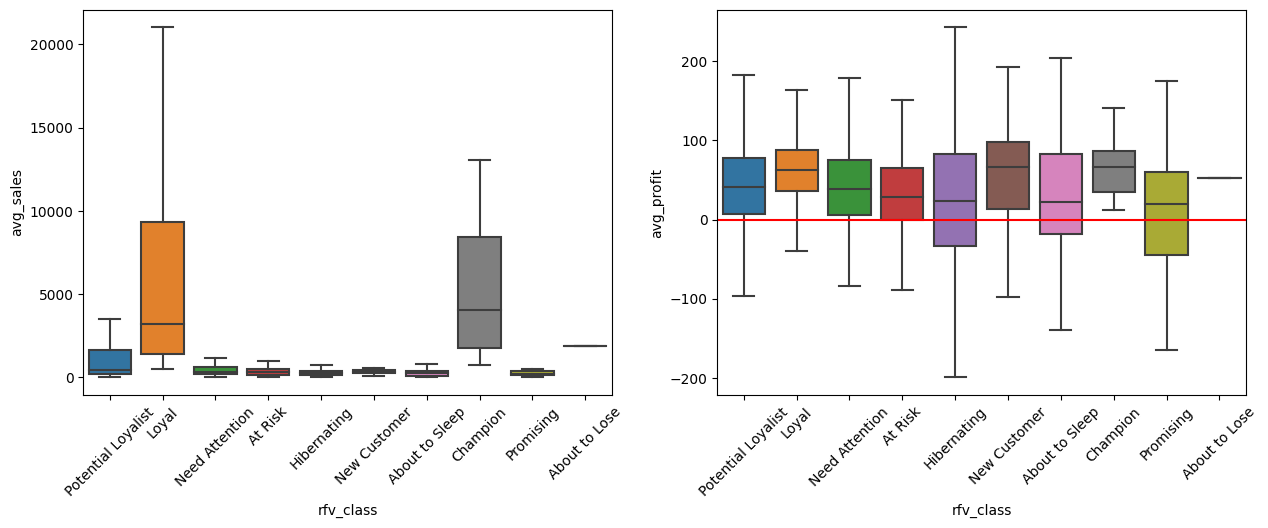

In [18]:
cluster_boxplot(cluster='rfv_class', y=['avg_sales', 'avg_profit'], data=df_customers, xticks_rotation=45,
                showfliers=False)
plt.axhline(0, color='r');

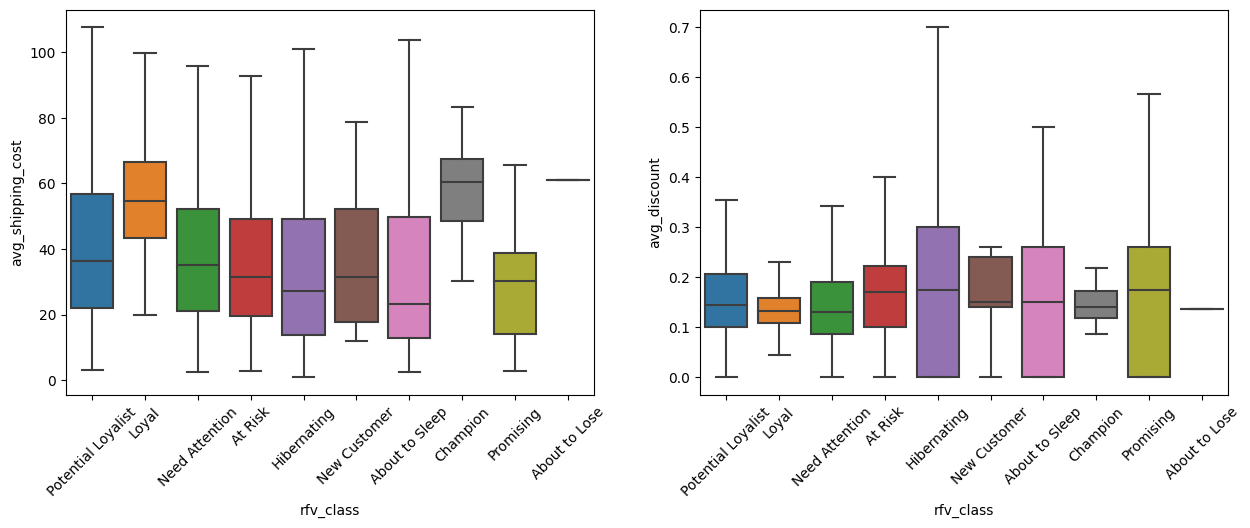

In [19]:
cluster_boxplot(cluster='rfv_class', y=['avg_shipping_cost', 'avg_discount'], data=df_customers, xticks_rotation=45,
                showfliers=False);

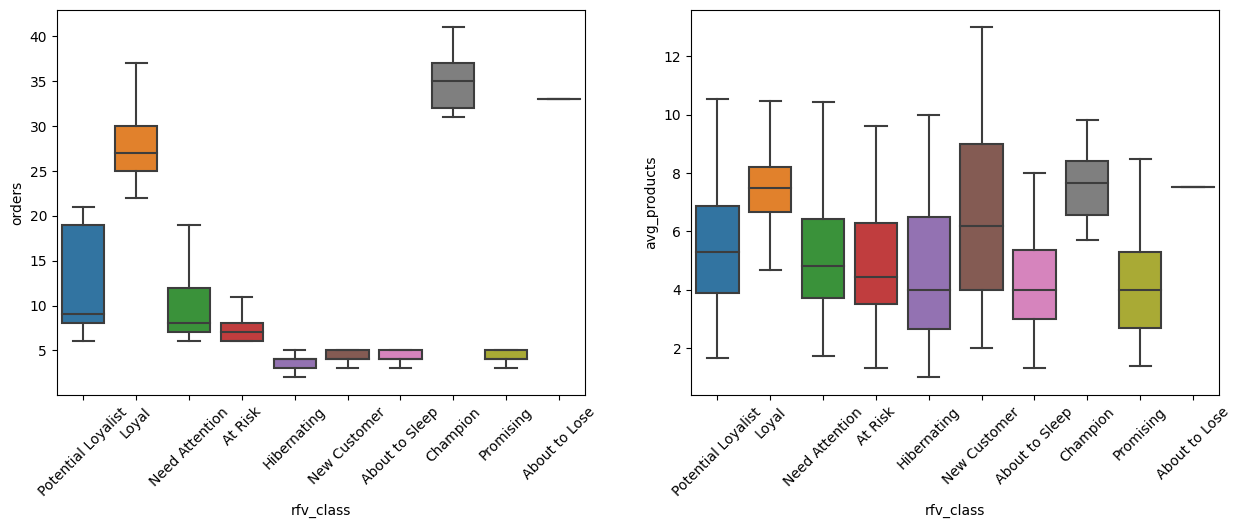

In [20]:
cluster_boxplot(cluster='rfv_class', y=['orders', 'avg_products'], data=df_customers, xticks_rotation=45,
                showfliers=False);

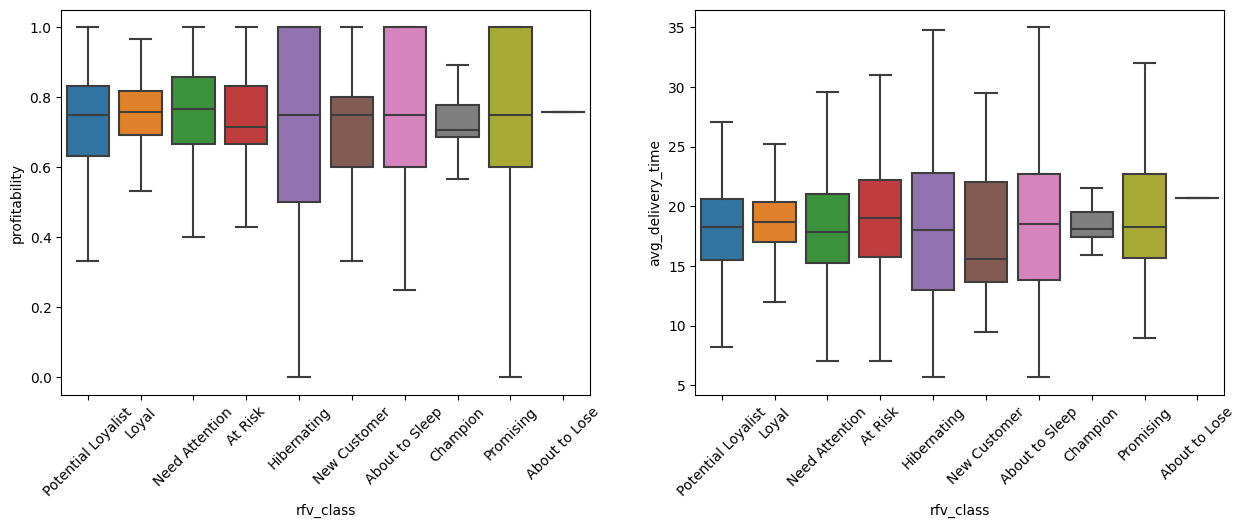

In [21]:
cluster_boxplot(cluster='rfv_class', y=['profitability', 'avg_delivery_time'], data=df_customers, xticks_rotation=45,
                showfliers=False);

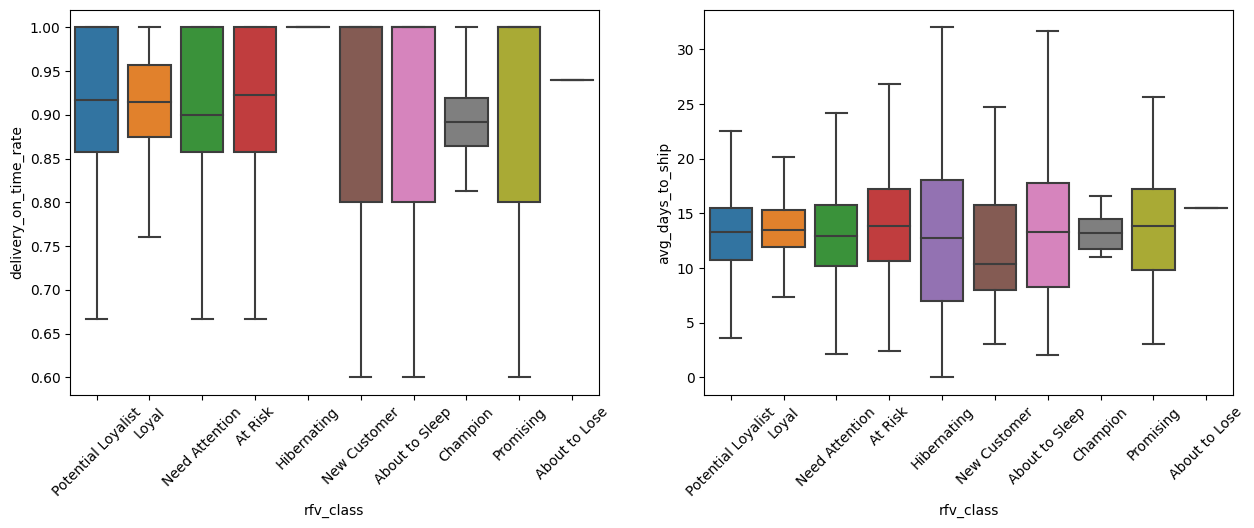

In [22]:
cluster_boxplot(cluster='rfv_class', y=['delivery_on_time_rate', 'avg_days_to_ship'], data=df_customers, xticks_rotation=45,
                showfliers=False);

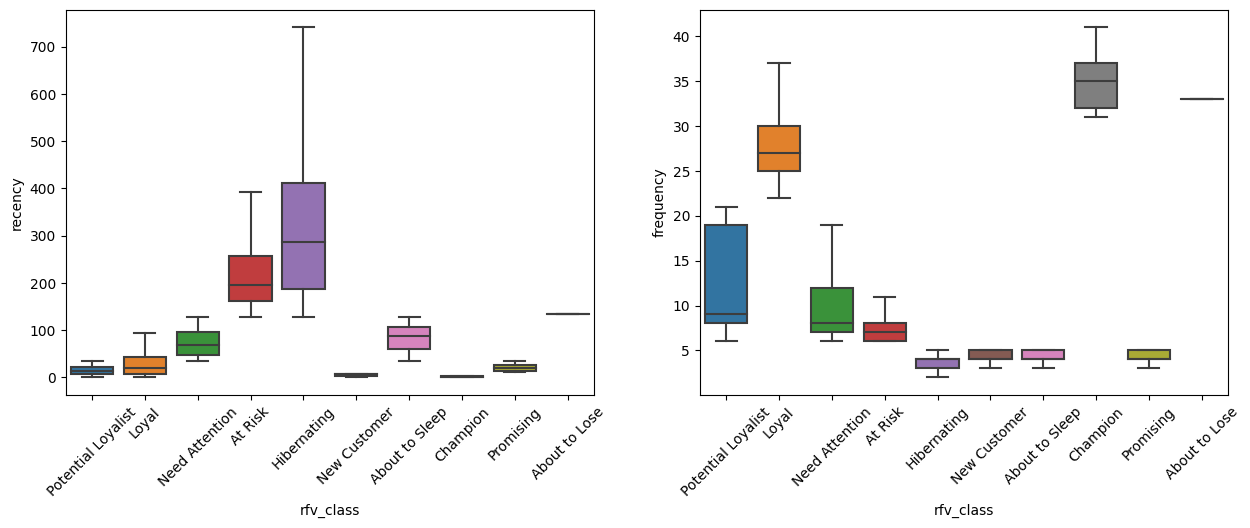

In [23]:
cluster_boxplot(cluster='rfv_class', y=['recency', 'frequency'], data=df_customers, xticks_rotation=45,
                showfliers=False);

## Business Answers

- **Who are our best customers?**

        Champions.
          They buy a lot and are always buying.

- **Who has the potential to become valuable customers?**
        
        Potential Loyalists, Promisings, and Need Attention.
          Similar average of orders and quantity of products,
          Different recency.
          They're all good customers, but as time passes by They change their RFV status.
          Potential Loyalists might Need Attention (stop buying)
          Promisings might become one or another.

- **Which of our customers are most likely to respond to engagement campaigns?**

        Need Attention.
          They're basically promising customers who have not been
          buying recently. So a Promotional Campaign can bring them
          back to spending.

        New Customer.
          First purchases. Potential to buy more, mainly if there's
          a engagement campaign.

_The more recent the purchase, the more responsive the customer is to promotions_



RFM: https://www.barilliance.com/rfm-analysis/#tve-jump-17b4fc9cc54)

Cohort Analysis: https://www.barilliance.com/cohort-analysis/
